In [3]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [1]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [11]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']

groups_3 = fetch_20newsgroups(categories=categories_3)

data_cleaned = [clean_text(doc) for doc in groups_3.data]

tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
data_tfidf = tfidf_vectorizer.fit_transform(data_cleaned)

tsne_model = TSNE(init="random", n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_tfidf.toarray())

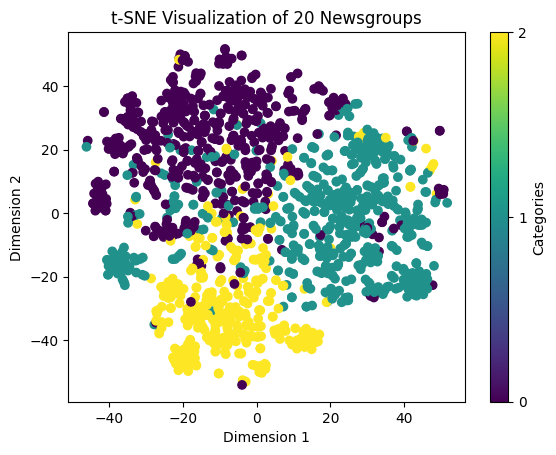

In [12]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target, cmap='viridis')
plt.title('t-SNE Visualization of 20 Newsgroups')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(ticks=range(len(categories_3)), label='Categories')
plt.show()

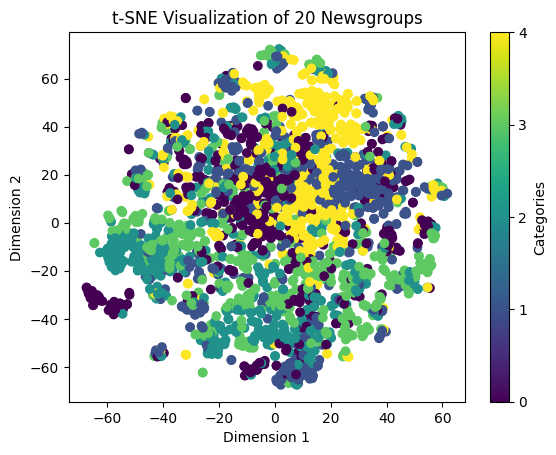

In [14]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                'comp.windows.x']
groups = fetch_20newsgroups(categories=categories)

data_cleaned = [clean_text(doc) for doc in groups.data]

tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
data_tfidf = tfidf_vectorizer.fit_transform(data_cleaned)

tsne_model = TSNE(init="random", n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_tfidf.toarray())

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups.target, cmap='viridis')
plt.title('t-SNE Visualization of 20 Newsgroups')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(ticks=range(len(categories)), label='Categories')
plt.show()